<a href="https://colab.research.google.com/github/sneraikar/Coronavirus-tweet-sentiment-analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

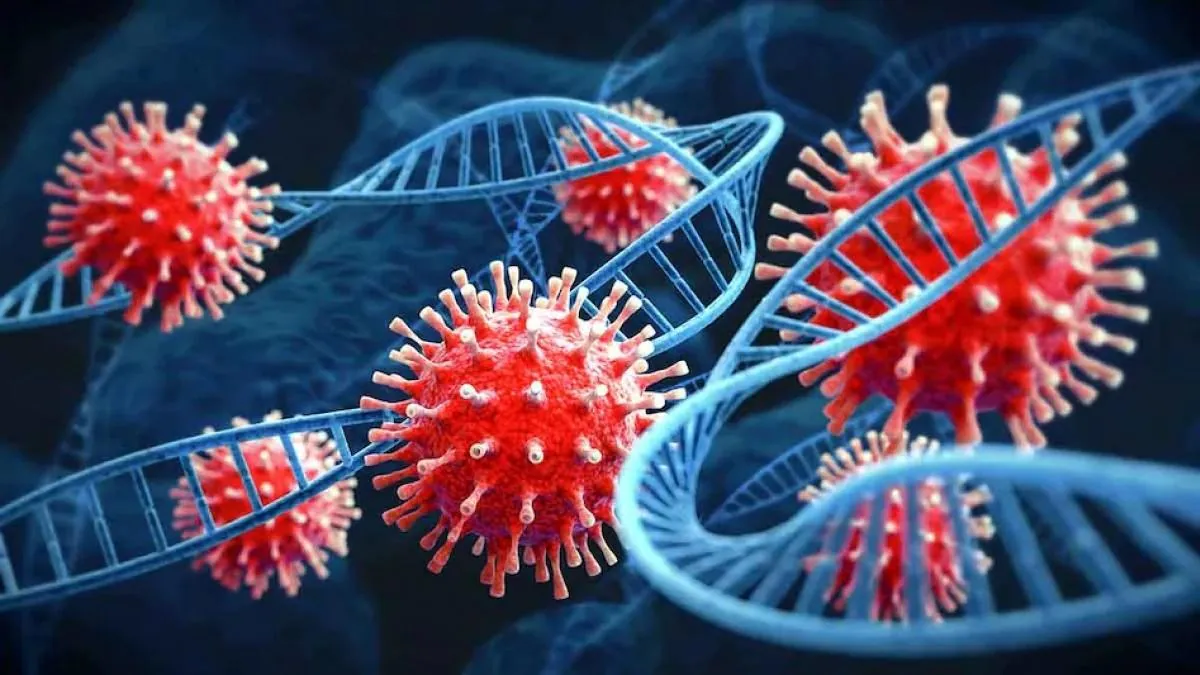

#Exploratory Data Analysis

**Import Libraries**

In [44]:
# import all necessary libraries

import pandas as pd
import numpy as np
from numpy import math
pd.pandas.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext google.colab.data_table

import re # for regular expressions
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words('english') # load stop words
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
import gensim

from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Read the dataset**

In [45]:
#mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
#load dataset using pandas function
df=pd.read_csv("/content/drive/MyDrive/Supervised classification/Coronavirus Tweets.csv",encoding="ISO-8859-1")

**Observations of dataset**

In [47]:
#print first 5 observations
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [48]:
#print last 5 observations
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Create a backup copy of data**

In [49]:
df_backup=df.copy()

**Check for duplicates**


In [50]:
print("Duplicate entries:",len(df[df.duplicated()]))

Duplicate entries: 0


In [51]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

**Basic information about dataset**

In [52]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n") 
# Custom Function
df.info()

Total Rows and Columns in DataFrame is : (41157, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**statistical info**


In [53]:
# statistics info
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


The dataset contains 41157 rows and 6 columns. Each row of the dataset contains information about one tweets.

In [54]:
# dataset contain Text data so its better to convert it into string 
df['OriginalTweet']=df['OriginalTweet'].astype(str)
df['Sentiment']=df['Sentiment'].astype(str)

**Missing values**

In [55]:
#to find columns having null values
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [56]:
df["Sentiment"].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [57]:
# Data has 5 clases of Sentiments,convert them into 3
def classes_con(x):

  if x == 'Extremely Positive':
    return "Positive"
  if x == 'Positive':
    return "Positive"   
  elif x == "'Extremely Negative":
    return "Negative"  
  elif x == "Negative":  
    return "Negative"  
  else:
    return "Neutral" 

df["Sentiment"]=df["Sentiment"].apply(lambda x:classes_con(x))    

df.Sentiment.value_counts()

Positive    18046
Neutral     13194
Negative     9917
Name: Sentiment, dtype: int64

#**Sentiment analysis**

In [58]:
analysis_1= df.groupby("Sentiment").count()['OriginalTweet'].reset_index().sort_values(by='OriginalTweet',ascending=False)
analysis_1

,Sentiment,OriginalTweet
2,Positive,18046
1,Neutral,13194
0,Negative,9917


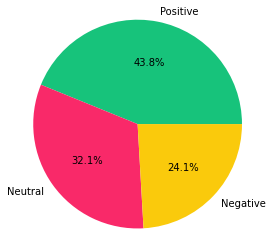

In [59]:
# count plot on Sentiment categorical variable
percent_class = analysis_1['OriginalTweet']
labels= analysis_1.Sentiment
colors = ['#17C37B','#F92969','#FACA0C']
fig=plt.pie(percent_class,labels=labels,colors=colors,autopct="%.1f%%",radius =1.2)

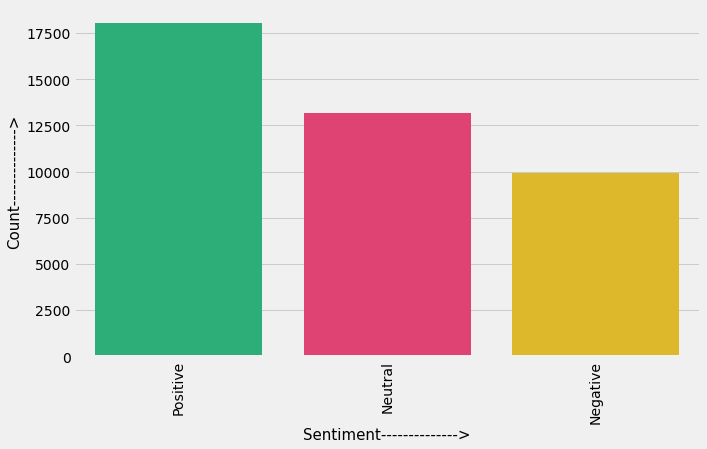

In [61]:
# ploting countplot for "Sentiment" column
plt.figure(figsize=(10,6))
plt.style.use("fivethirtyeight")
sns.countplot('Sentiment',data=df,order=df.Sentiment.value_counts().index,palette = ['#17C37B','#F92969','#FACA0C'])
plt.xlabel("Sentiment-------------->", fontsize=15)
plt.ylabel("Count-------------->", fontsize=15)
plt.xticks(rotation=90)
plt.show();

**Number of characters**

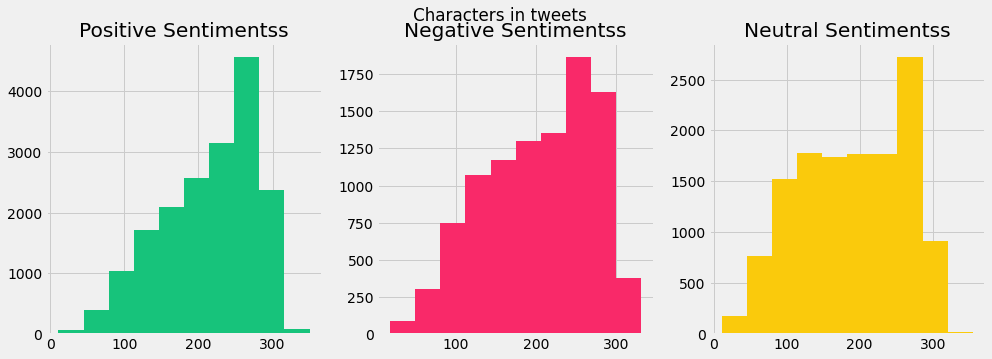

In [64]:
# Histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= df[df['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='#17C37B')
ax1.set_title('Positive Sentimentss')

# Histogram for Negative Sentiments
tweet_len=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='#F92969')
ax2.set_title('Negative Sentimentss')

# Histogram for Neutral Sentiments
tweet_len=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='#FACA0C')
ax3.set_title('Neutral Sentimentss')

fig.suptitle('Characters in tweets')
plt.show()

**Number of words in a tweet**

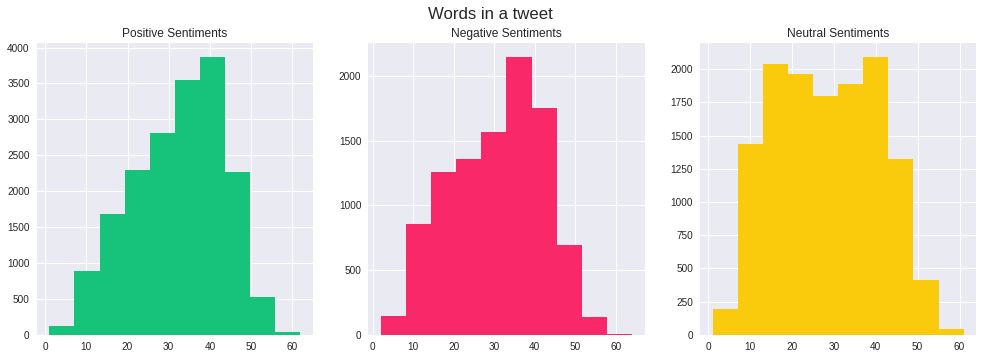

In [68]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
plt.style.use('seaborn')
# Histogram for Positive Sentiments
tweet=df[df['Sentiment']=="Positive"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet,color='#17C37B')
ax1.set_title('Positive Sentiments')

# Histogram for Negative Sentiments
tweet=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet,color='#F92969')
ax2.set_title('Negative Sentiments')

# Histogram for Neutral Sentiments
tweet=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.split().map(lambda x: len(x))
ax3.hist(tweet,color='#FACA0C')
ax3.set_title('Neutral Sentiments')

fig.suptitle('Words in a tweet')
plt.show()

**Common stopwords in tweets**